In [3]:
import pandas as pd
URL='https://drive.google.com/file/d/19bXHC3jZBd7AEBTGjFwxvm3jXFUekx9m/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]

dataset = pd.read_csv(path)
dataset.head()

,admit,gre,gpa
0,0,380,3.61
1,1,660,3.67
2,1,800,4.00
3,1,640,3.19
4,0,520,2.93


In [4]:
X=dataset.iloc[ : , 1:3 ]
y=dataset.iloc[ : , 0 ]

In [5]:
dataset.isnull().sum()

admit    0
gre      0
gpa      0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
classifier=LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [9]:
classifier.score(X_test, y_test)

0.83

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[40,  6],
       [11, 43]])

In [12]:
from warnings import filterwarnings
filterwarnings('ignore')

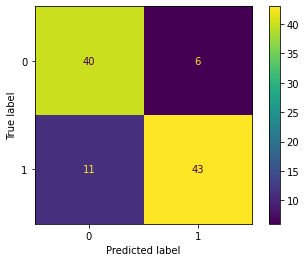

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test);

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.87      0.82        46
           1       0.88      0.80      0.83        54

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



In [15]:
from sklearn.metrics import accuracy_score,log_loss,roc_auc_score,f1_score,precision_score,recall_score
for metric_name in [accuracy_score,log_loss,roc_auc_score,f1_score,precision_score,recall_score]:
    metric = metric_name(y_test, y_pred)
    display(f'{metric_name.__name__} - {metric}')


'accuracy_score - 0.83'

'log_loss - 5.871639962980628'

'roc_auc_score - 0.8329307568438004'

'f1_score - 0.8349514563106796'

'precision_score - 0.8775510204081632'

'recall_score - 0.7962962962962963'

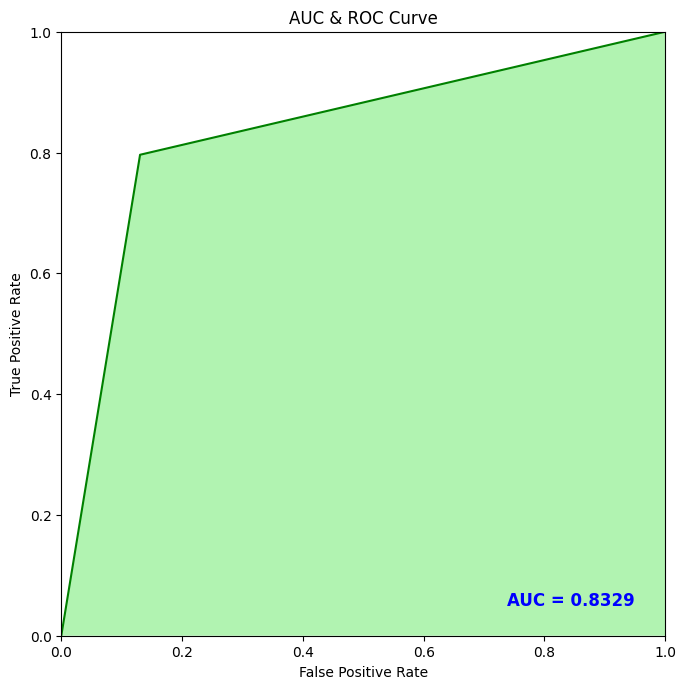

In [17]:
import sklearn.metrics 
auc = sklearn.metrics.roc_auc_score(y_test, y_pred)
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresolds = sklearn.metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()